Clustering model for diabetes

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
diabetes = pd.read_csv('diabetes_dataset.csv')

In [3]:
diabetes.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [4]:
len(diabetes)

10000

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

# Check for Missing Values

In [6]:
missing_values = diabetes.isnull().sum()

In [7]:
missing_values

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

Alchol Consumption have 3320 missing values

In [8]:
diabetes["Alcohol_Consumption"].head()

0    Moderate
1    Moderate
2       Heavy
3    Moderate
4       Heavy
Name: Alcohol_Consumption, dtype: object

In [9]:
diabetes["Alcohol_Consumption"].unique()

array(['Moderate', 'Heavy', nan], dtype=object)

# Cleaning

In [10]:
# dropping null values in Alcohol_Consumption
diabetes.dropna(subset=["Alcohol_Consumption"],inplace=True)

In [11]:
missing_values = diabetes.isnull().sum()

In [12]:
missing_values

Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64

In [13]:
len(diabetes)

6680

In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6680 non-null   int64  
 1   Age                            6680 non-null   int64  
 2   Sex                            6680 non-null   object 
 3   Ethnicity                      6680 non-null   object 
 4   BMI                            6680 non-null   float64
 5   Waist_Circumference            6680 non-null   float64
 6   Fasting_Blood_Glucose          6680 non-null   float64
 7   HbA1c                          6680 non-null   float64
 8   Blood_Pressure_Systolic        6680 non-null   int64  
 9   Blood_Pressure_Diastolic       6680 non-null   int64  
 10  Cholesterol_Total              6680 non-null   float64
 11  Cholesterol_HDL                6680 non-null   float64
 12  Cholesterol_LDL                6680 non-null   float6

# Encoding

In [15]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
# apply label encoder to the 'Alcohol_Consumption' column
diabetes['Alcohol_Consumption'] = label_encoder.fit_transform(diabetes['Alcohol_Consumption'])

In [18]:
diabetes["Sex"] = label_encoder.fit_transform(diabetes["Sex"])

In [19]:
diabetes["Ethnicity"] = label_encoder.fit_transform(diabetes["Ethnicity"])

In [20]:
diabetes["Physical_Activity_Level"] = label_encoder.fit_transform(diabetes["Physical_Activity_Level"])
diabetes["Smoking_Status"] = label_encoder.fit_transform(diabetes["Smoking_Status"])

In [21]:
diabetes.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,0,3,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,2,1538,1,2,0,1
1,1,48,1,0,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,2,2653,1,0,0,1
2,2,34,0,1,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,1,1684,0,1,1,0
3,3,62,1,0,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,1,3796,1,2,1,0
4,4,27,0,0,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,2,3161,0,0,0,0


In [22]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6680 non-null   int64  
 1   Age                            6680 non-null   int64  
 2   Sex                            6680 non-null   int64  
 3   Ethnicity                      6680 non-null   int64  
 4   BMI                            6680 non-null   float64
 5   Waist_Circumference            6680 non-null   float64
 6   Fasting_Blood_Glucose          6680 non-null   float64
 7   HbA1c                          6680 non-null   float64
 8   Blood_Pressure_Systolic        6680 non-null   int64  
 9   Blood_Pressure_Diastolic       6680 non-null   int64  
 10  Cholesterol_Total              6680 non-null   float64
 11  Cholesterol_HDL                6680 non-null   float64
 12  Cholesterol_LDL                6680 non-null   float6

In [23]:
diabetes.drop(columns=["Unnamed: 0"], inplace=True)

In [24]:
diabetes.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,0,3,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,2,1538,1,2,0,1
1,48,1,0,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,2,2653,1,0,0,1
2,34,0,1,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,1,1684,0,1,1,0
3,62,1,0,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,1,3796,1,2,1,0
4,27,0,0,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,2,3161,0,0,0,0


# Correlation
correlation graphs are called heatmaps

In [25]:
import seaborn as sns

In [26]:
correlation = diabetes.corr()

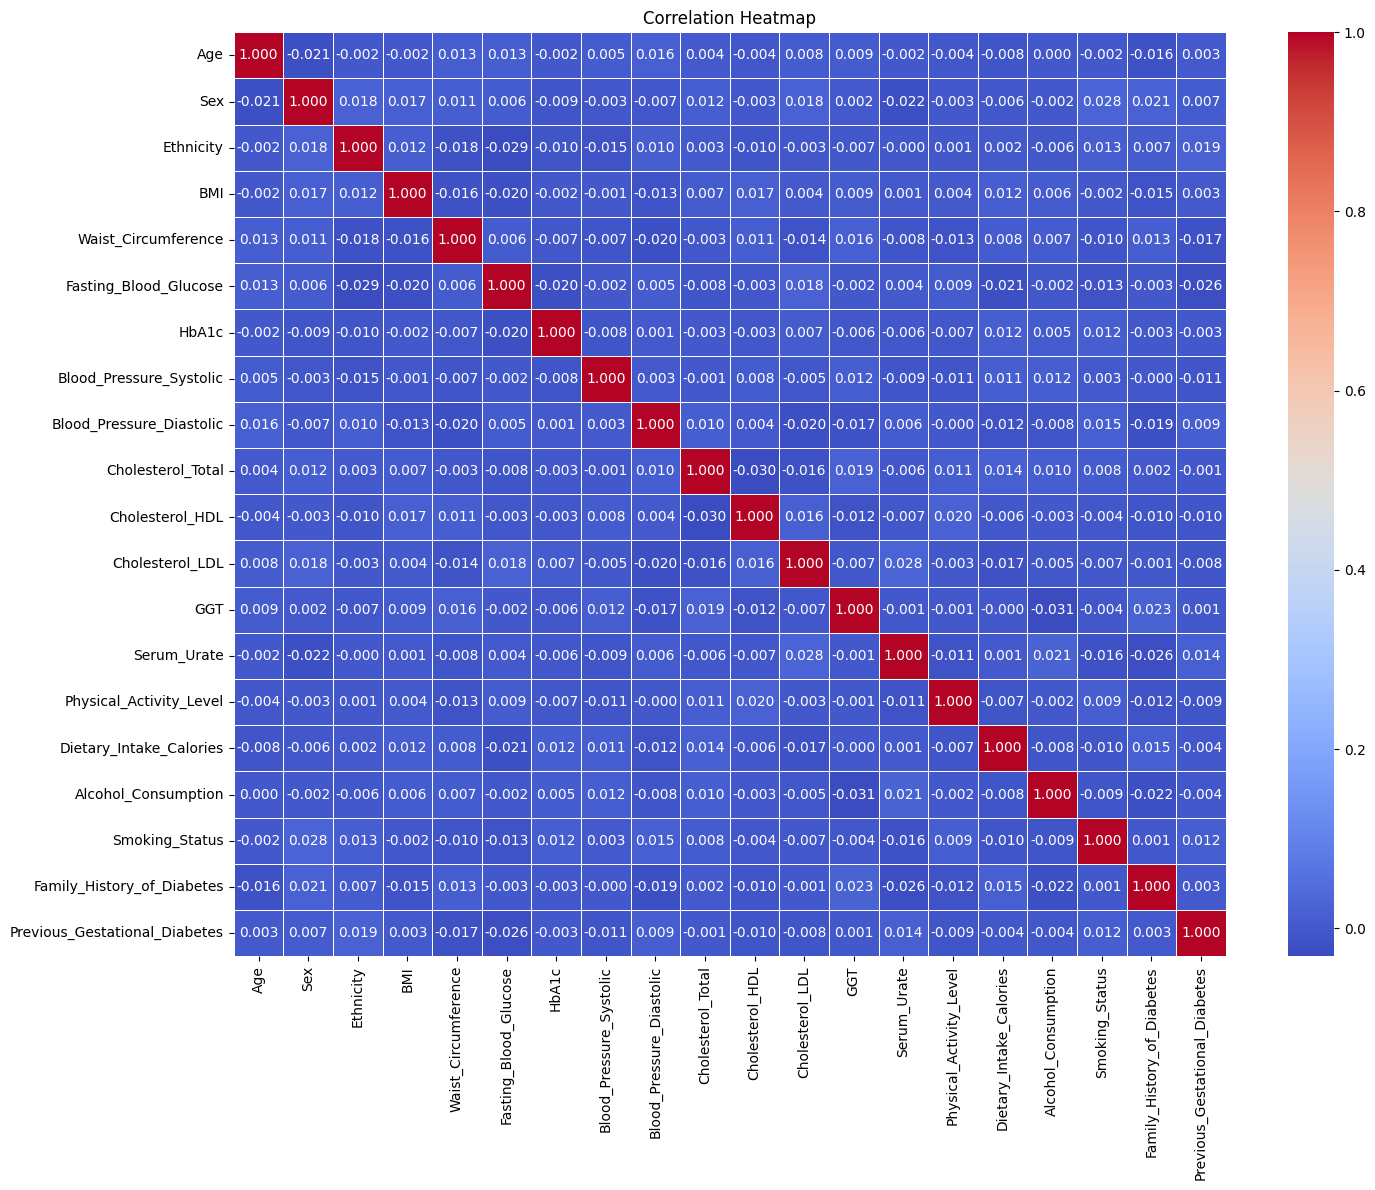

In [27]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.7)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
correlation

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
Age,1.000000,-0.020772,-0.002115,-0.001553,0.012752,0.012928,-0.001814,0.005120,0.015929,0.003666,-0.003959,0.008223,0.008782,-0.001989,-0.004357,-0.008151,0.000070,-0.002409,-0.016222,0.002701
Sex,-0.020772,1.000000,0.017980,0.017017,0.011375,0.006094,-0.008631,-0.003102,-0.006664,0.011783,-0.003039,0.017889,0.001513,-0.022258,-0.002691,-0.005996,-0.002161,0.027703,0.020516,0.006988
Ethnicity,-0.002115,0.017980,1.000000,0.012214,-0.018341,-0.029051,-0.010201,-0.014660,0.009692,0.003173,-0.010130,-0.003331,-0.007023,-0.000351,0.000913,0.002111,-0.005780,0.012746,0.006560,0.018506
BMI,-0.001553,0.017017,0.012214,1.000000,-0.015628,-0.020469,-0.002007,-0.001265,-0.013273,0.006957,0.016610,0.003702,0.008873,0.001322,0.003524,0.012196,0.006278,-0.001834,-0.014584,0.002733
Waist_Circumference,0.012752,0.011375,-0.018341,-0.015628,1.000000,0.005962,-0.006990,-0.007397,-0.019586,-0.003268,0.010782,-0.013696,0.016085,-0.008215,-0.013157,0.007624,0.006510,-0.009581,0.012831,-0.017268
Fasting_Blood_Glucose,0.012928,0.006094,-0.029051,-0.020469,0.005962,1.000000,-0.020437,-0.001653,0.005225,-0.008424,-0.003222,0.017657,-0.001559,0.003781,0.008704,-0.021234,-0.001567,-0.012788,-0.002788,-0.025710
HbA1c,-0.001814,-0.008631,-0.010201,-0.002007,-0.006990,-0.020437,1.000000,-0.008263,0.001434,-0.002954,-0.003364,0.006570,-0.005534,-0.005786,-0.006550,0.011955,0.005228,0.012056,-0.002822,-0.003041
Blood_Pressure_Systolic,0.005120,-0.003102,-0.014660,-0.001265,-0.007397,-0.001653,-0.008263,1.000000,0.002857,-0.001318,0.007530,-0.004753,0.012490,-0.008541,-0.010865,0.010636,0.011521,0.003396,-0.000114,-0.010826
Blood_Pressure_Diastolic,0.015929,-0.006664,0.009692,-0.013273,-0.019586,0.005225,0.001434,0.002857,1.000000,0.010480,0.003778,-0.019784,-0.017354,0.006416,-0.000103,-0.011667,-0.007990,0.015432,-0.019447,0.009387
Cholesterol_Total,0.003666,0.011783,0.003173,0.006957,-0.003268,-0.008424,-0.002954,-0.001318,0.010480,1.000000,-0.029835,-0.016163,0.019338,-0.006297,0.011364,0.013681,0.010362,0.007673,0.002163,-0.001248


In [28]:
corr_values = correlation.abs().unstack().sort_values(ascending=False)

corr_values = corr_values[corr_values < 1]

In [29]:
corr_values.head(10)

Alcohol_Consumption    GGT                      0.031247
GGT                    Alcohol_Consumption      0.031247
Cholesterol_HDL        Cholesterol_Total        0.029835
Cholesterol_Total      Cholesterol_HDL          0.029835
Fasting_Blood_Glucose  Ethnicity                0.029051
Ethnicity              Fasting_Blood_Glucose    0.029051
Cholesterol_LDL        Serum_Urate              0.028392
Serum_Urate            Cholesterol_LDL          0.028392
Smoking_Status         Sex                      0.027703
Sex                    Smoking_Status           0.027703
dtype: float64

# Train

In [32]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6680 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            6680 non-null   int64  
 1   Sex                            6680 non-null   int64  
 2   Ethnicity                      6680 non-null   int64  
 3   BMI                            6680 non-null   float64
 4   Waist_Circumference            6680 non-null   float64
 5   Fasting_Blood_Glucose          6680 non-null   float64
 6   HbA1c                          6680 non-null   float64
 7   Blood_Pressure_Systolic        6680 non-null   int64  
 8   Blood_Pressure_Diastolic       6680 non-null   int64  
 9   Cholesterol_Total              6680 non-null   float64
 10  Cholesterol_HDL                6680 non-null   float64
 11  Cholesterol_LDL                6680 non-null   float64
 12  GGT                            6680 non-null   float6

In [35]:
features =[
    "Alcohol_Consumption", "GGT", "Cholesterol_HDL", "Cholesterol_Total", "Fasting_Blood_Glucose", "Ethnicity", "Cholesterol_LDL", "Serum_Urate", 
    "Smoking_Status", "Sex"
]

In [36]:
X = diabetes[features]

In [37]:
X.head()

,Alcohol_Consumption,GGT,Cholesterol_HDL,Cholesterol_Total,Fasting_Blood_Glucose,Ethnicity,Cholesterol_LDL,Serum_Urate,Smoking_Status,Sex
0,1,37.5,50.2,197.8,123.9,3,99.2,7.2,2,0
1,1,88.5,62.0,261.6,183.7,0,146.4,6.1,0,1
2,0,56.2,32.1,261.0,142.0,1,164.1,6.9,1,0
3,1,34.4,41.1,183.4,167.4,0,84.0,5.4,2,1
4,0,81.9,53.9,203.2,146.4,0,92.8,7.4,0,0


# KMeans

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [40]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [43]:
diabetes["cluster"] = kmeans.labels_
diabetes.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,cluster
0,58,0,3,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,2,1538,1,2,0,1,0
1,48,1,0,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,2,2653,1,0,0,1,1
2,34,0,1,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,1,1684,0,1,1,0,1
3,62,1,0,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,1,3796,1,2,1,0,0
4,27,0,0,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,2,3161,0,0,0,0,0


In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [46]:
diabetes["PC1"] = X_pca[:,0]
diabetes["PC2"] = X_pca[:,1]

In [47]:
diabetes.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,cluster,PC1,PC2
0,58,0,3,35.8,83.4,123.9,10.9,152,114,197.8,...,7.2,2,1538,1,2,0,1,0,-24.933238,-29.822529
1,48,1,0,24.1,71.4,183.7,12.8,103,91,261.6,...,6.1,2,2653,1,0,0,1,1,34.351593,49.851132
2,34,0,1,25.0,113.8,142.0,14.5,179,104,261.0,...,6.9,1,1684,0,1,1,0,1,33.923881,24.735772
3,62,1,0,32.7,100.4,167.4,8.8,176,118,183.4,...,5.4,1,3796,1,2,1,0,0,-39.892392,-2.725392
4,27,0,0,33.5,110.8,146.4,7.1,122,97,203.2,...,7.4,2,3161,0,0,0,0,0,-19.186317,-14.359794


# Plotting PCA wih clusters

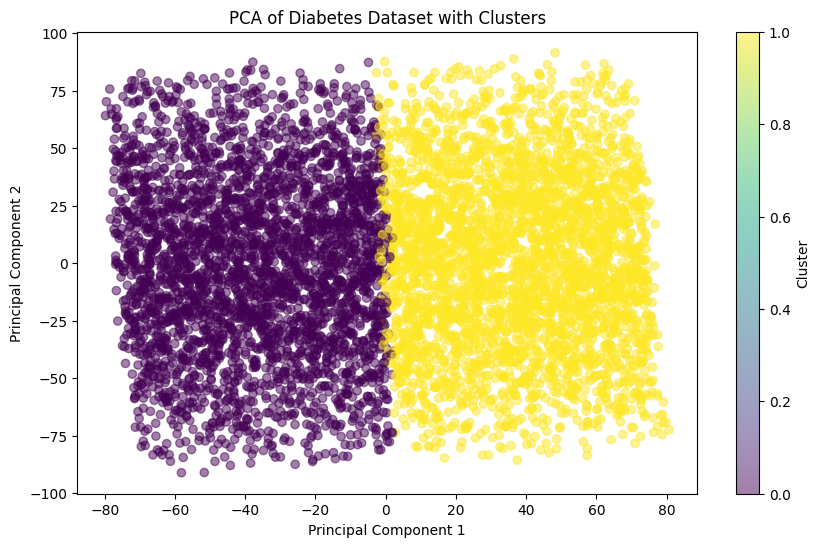

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(diabetes["PC1"], diabetes["PC2"], c=diabetes["cluster"], cmap='viridis', alpha=0.5)
plt.title("PCA of Diabetes Dataset with Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Evaluation

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [50]:
sil = silhouette_score(X, diabetes["cluster"])
db = davies_bouldin_score(X, diabetes["cluster"])

In [51]:
print(f"Silhouette Score: {sil}")
print(f"Davies-Bouldin Score: {db}")

Silhouette Score: 0.22674255524436804
Davies-Bouldin Score: 1.690940923470035
